! pip install numpy
! pip install numpy
! pip install matplotlib
! pip install keras
! pip install tensorflow
! pip install pandas
! pip install sklearn

In [1]:
#import kagglehub  This was for downloading the dataset in google colab
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Question #1



In [2]:
# Download from kaggle
#path = kagglehub.dataset_download("sakshigoyal7/credit-card-customers")
#print("Path to dataset files:", path)

1-1

In [3]:
Raw_Data = pd.read_csv("BankChurners.csv")
Raw_Data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

We can see the column names using the code below

In [4]:
#getting the column names
Raw_Data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

This dataset has 10127 rows

In [5]:
#outputs rows and columns
Raw_Data.shape

(10127, 23)

1-2

In [6]:
#remove the columns with long names (only for this step)
Selected_Data = Raw_Data.drop(columns = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",	"Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
Selected_Data

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124  

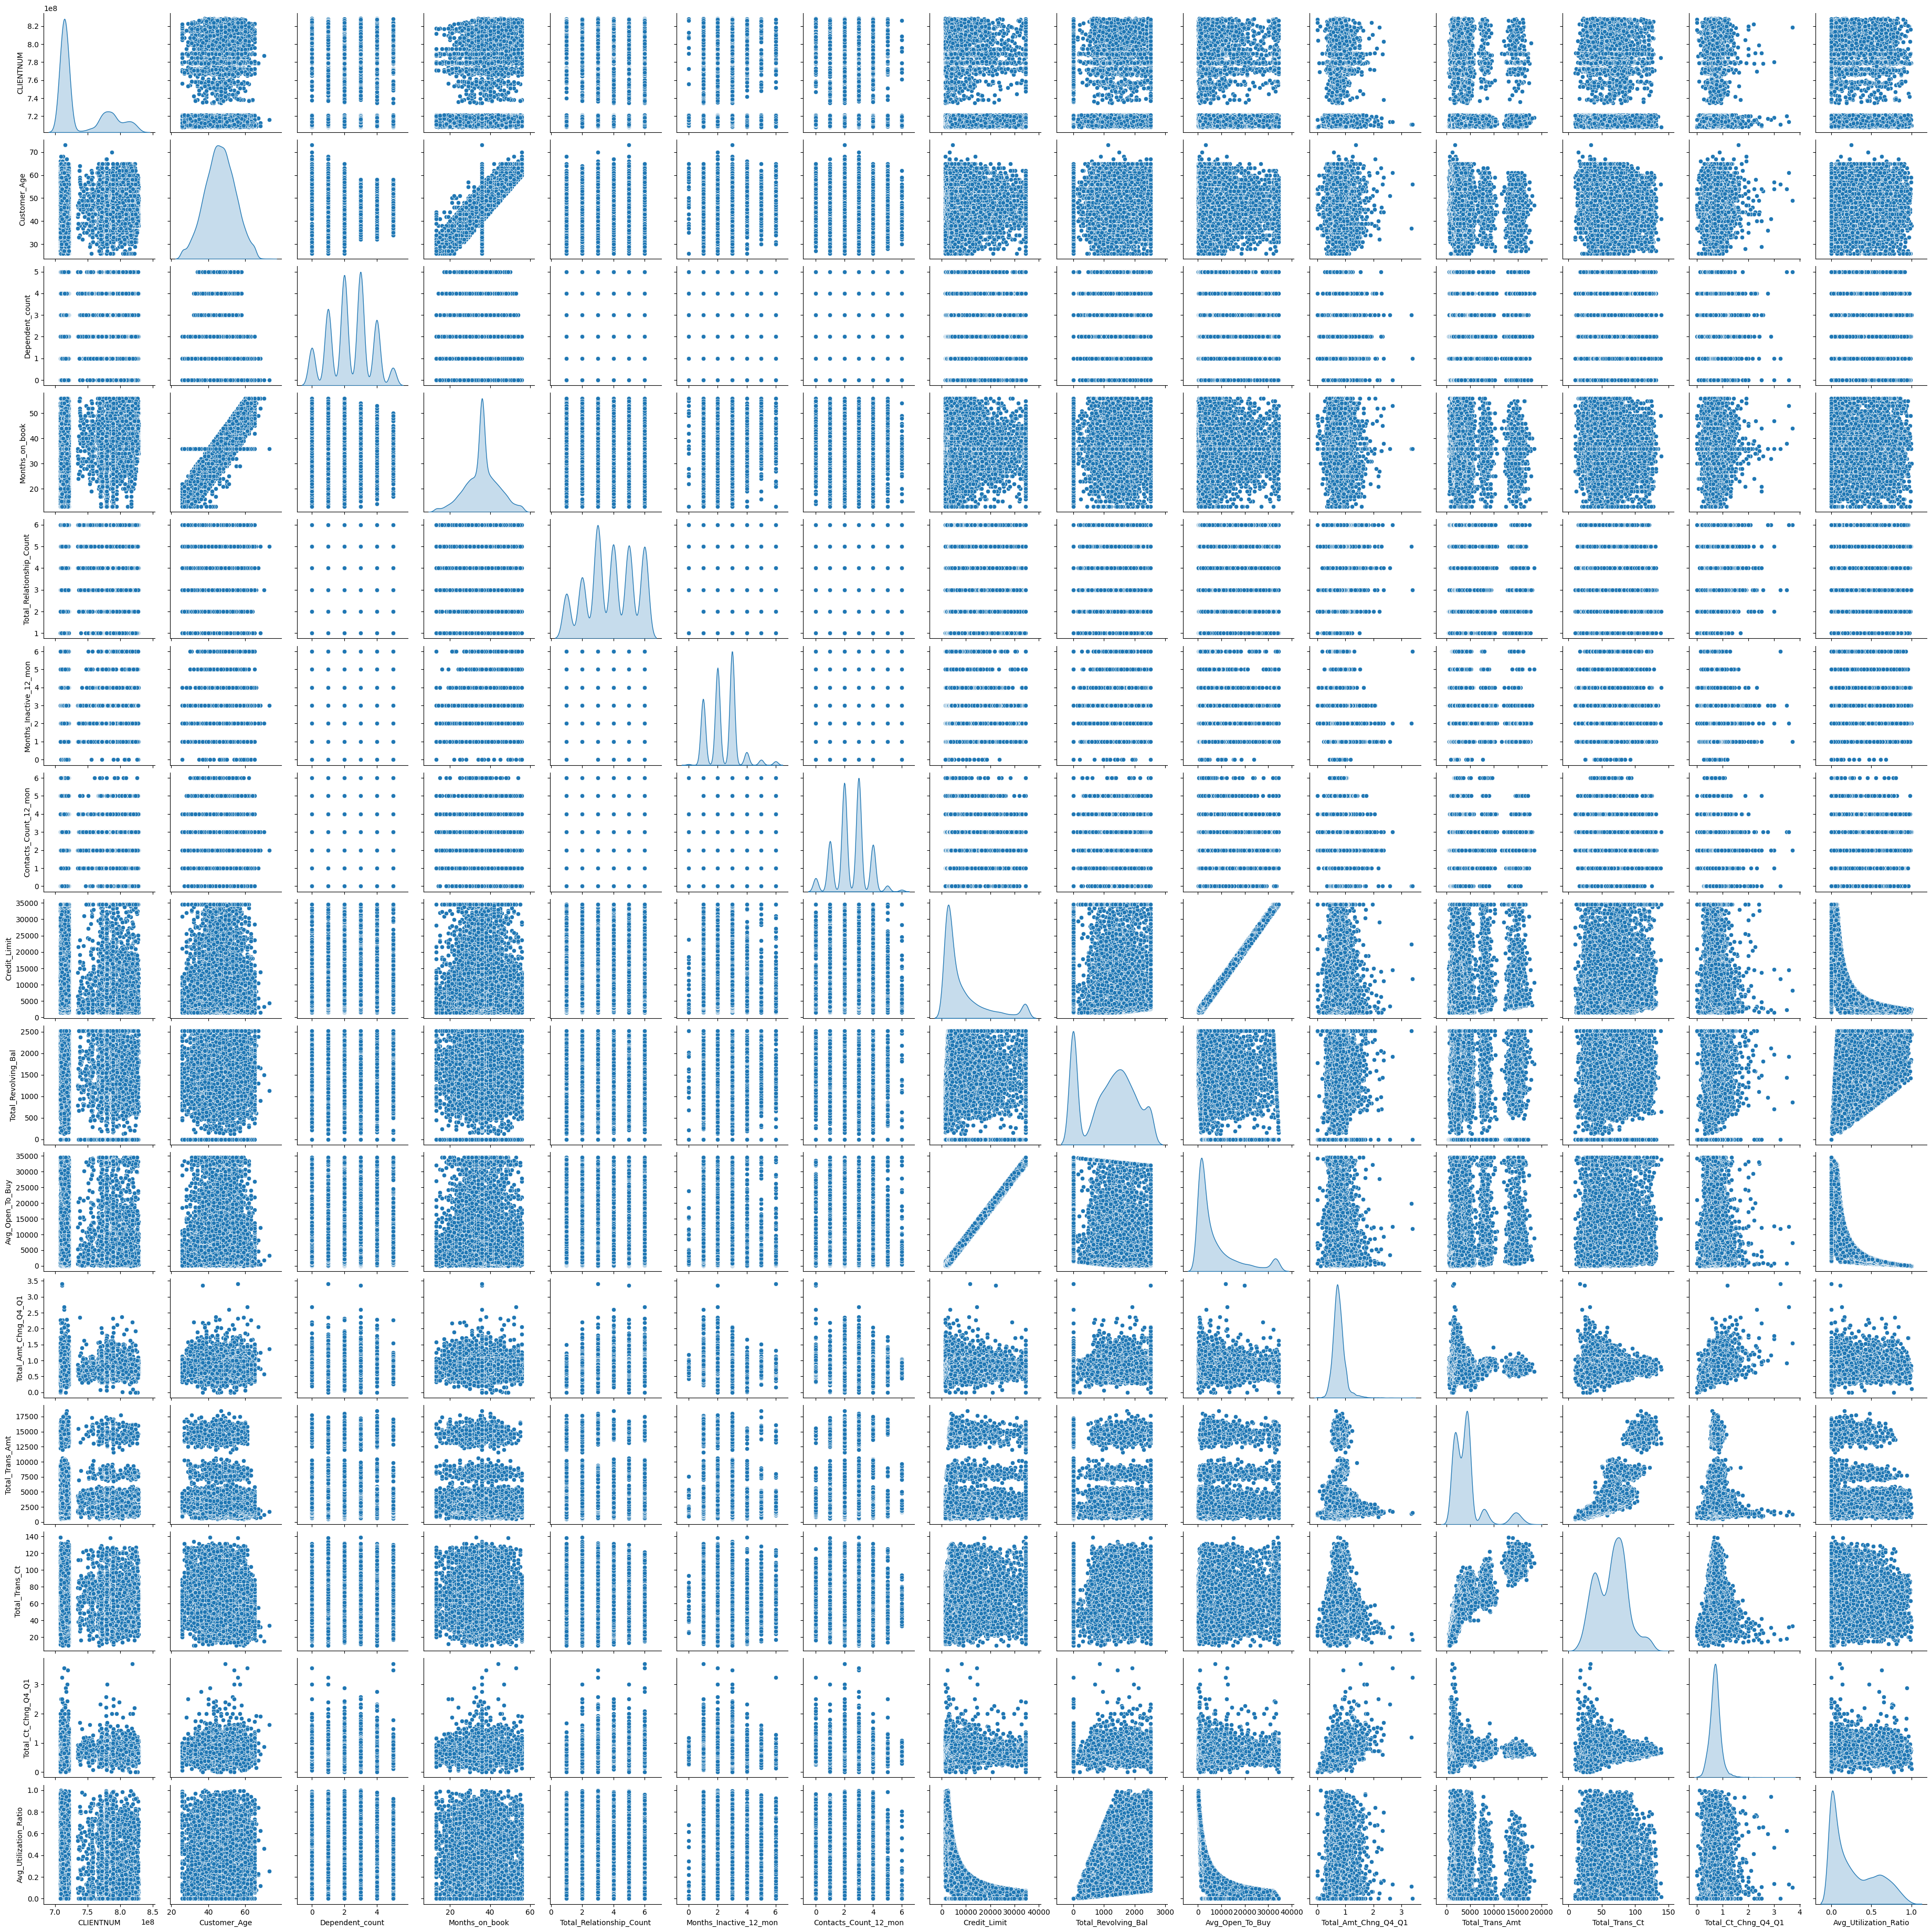

In [7]:
#show pairplt of the selected data
sns.pairplot(Selected_Data, diag_kind='kde')

1-3

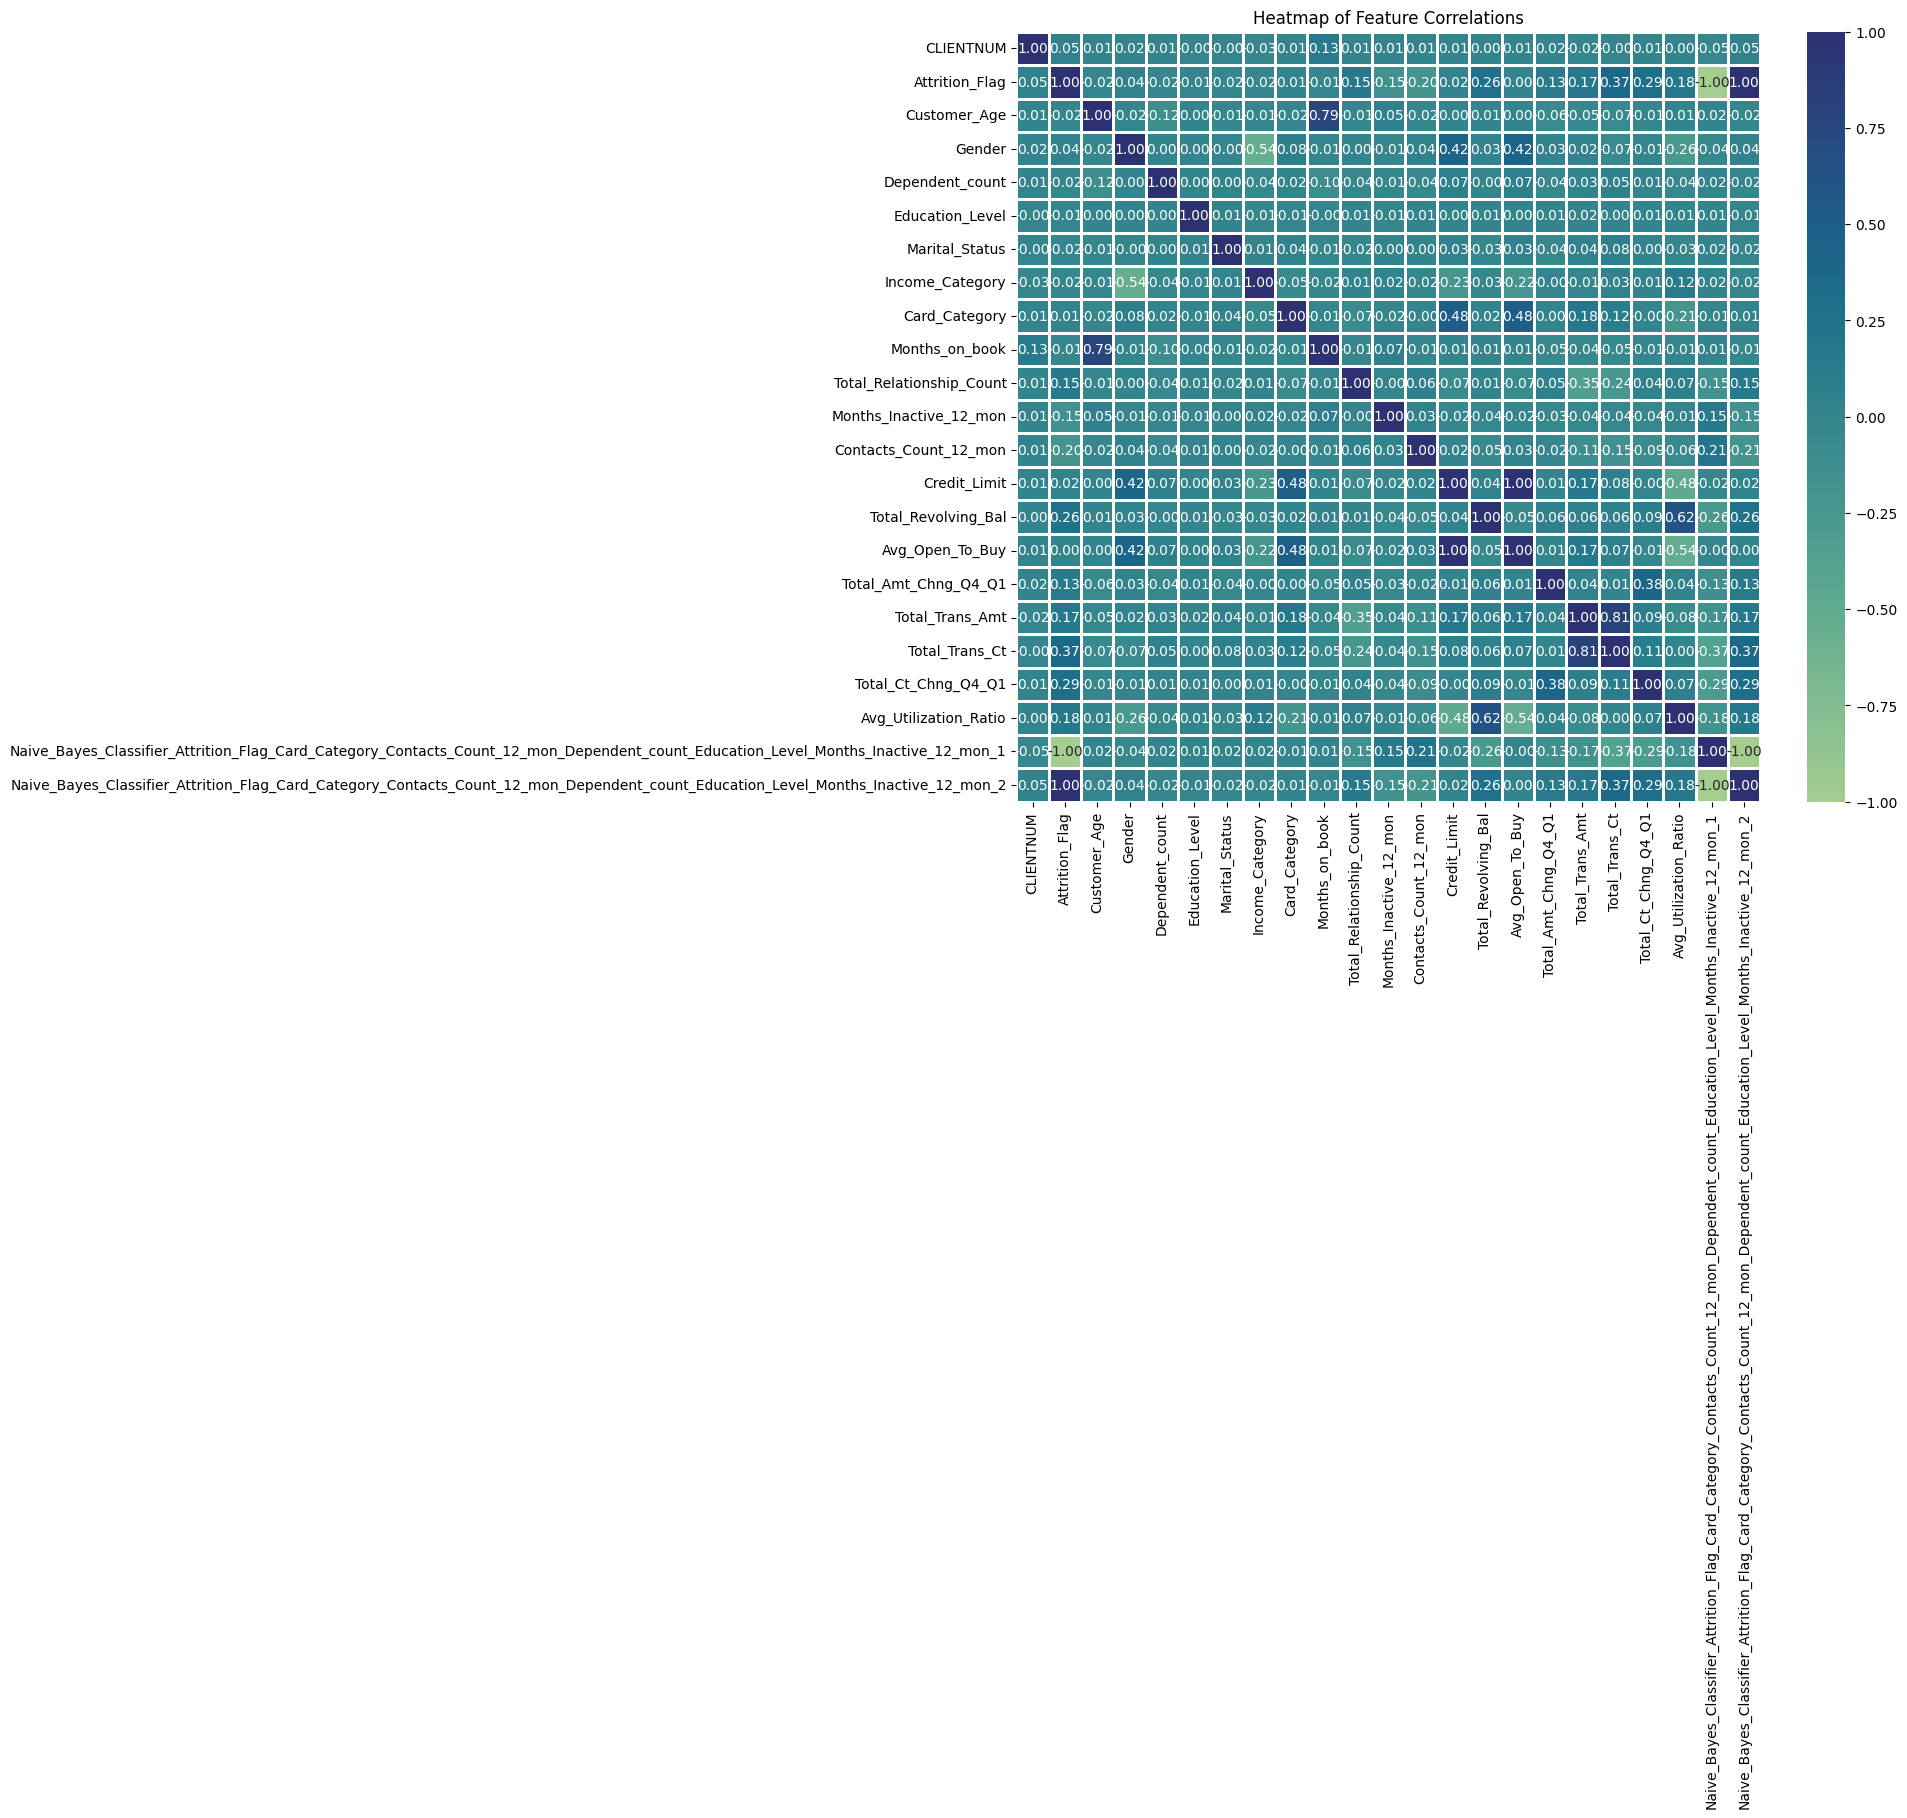

In [8]:
#encodes string catagories into numbers
Encoded_Data = Raw_Data.copy()
for i in Raw_Data.select_dtypes(include=["object", "string"]).columns:
  Encoded_Data[i] = Encoded_Data[i].astype('category').cat.codes

#correlation matrix
correlation_matrix = Encoded_Data[Raw_Data.columns].corr()

#show heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest' , fmt=".2f", linewidths=1)
plt.title('Heatmap of Feature Correlations')
plt.show()


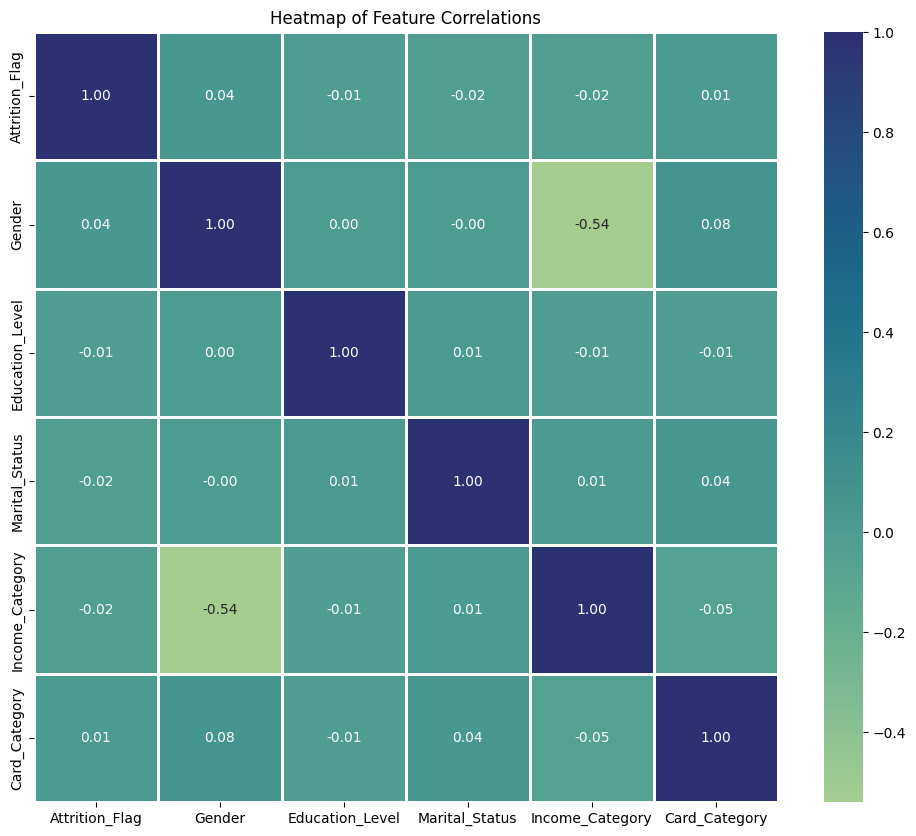

In [9]:
#encodes string catagories into numbers
Encoded_Data = Raw_Data.copy()
for i in Raw_Data.select_dtypes(include=["object", "string"]).columns:
  Encoded_Data[i] = Encoded_Data[i].astype('category').cat.codes

#correlation matrix
correlation_matrix = Encoded_Data[Raw_Data.select_dtypes(include=["object", "string"]).columns].corr()

#show heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest' , fmt=".2f", linewidths=1)
plt.title('Heatmap of Feature Correlations')
plt.show()

1-4

In [10]:
nan_locations = Encoded_Data.isna()  # Returns a DataFrame of True/False for NaN

#number of nan in each column
total_nans = nan_locations.sum().sum()
print(f"\nTotal number of NaN values: {total_nans}")

#total number of nan
nan_per_column = nan_locations.sum()
print(f"\nNumber of NaN values per column: {nan_per_column}")


Total number of NaN values: 0

Number of NaN values per column: CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                         

In [11]:
#removing nan (not needed because we dont have nan)
Encoded_Data = Encoded_Data.dropna()
Encoded_Data.shape

(10127, 23)

1-5

In [12]:
# Finding unique categories for each column which contains a string
string_columns = Raw_Data.select_dtypes(include=["object", "string"]).columns
unique_categories = {col: Raw_Data[col].unique() for col in string_columns}

print("\nUnique categories in each column:")
for col, categories in unique_categories.items():
    print(f"{col}: {categories}")


Unique categories in each column:
Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


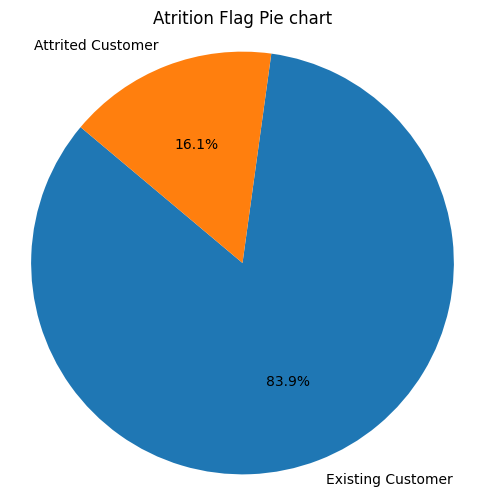

In [13]:
Attrition_Flag_number =Raw_Data['Attrition_Flag'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Attrition_Flag_number, labels=Attrition_Flag_number.index, autopct='%1.1f%%', startangle=140) #autopct is for showing the percentages
plt.title('Atrition Flag Pie chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

1-6

In [14]:
#here we divide the inputs and outputs
X = Encoded_Data.drop("Attrition_Flag",axis=1)
Y = Encoded_Data["Attrition_Flag"]
print(X.shape)
print(Y.shape)

(10127, 22)
(10127,)


In [15]:
# Splitting the dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=101)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(Y_train.shape)
print(Y_test.shape)
print(Y_val.shape)

(6835, 22)
(2279, 22)
(1013, 22)
(6835,)
(2279,)
(1013,)


In [16]:
#1st model: training without balancing ----
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, Y_train)

#predictions and evaluation on training data
Y_train_pred = clf.predict(X_train)
train_report_imbalanced = classification_report(Y_train, Y_train_pred)
train_cm_imbalanced = confusion_matrix(Y_train, Y_train_pred)

#predictions and evaluation on test data
Y_test_pred = clf.predict(X_test)
test_report_imbalanced = classification_report(Y_test, Y_test_pred)
test_cm_imbalanced = confusion_matrix(Y_test, Y_test_pred)

#---- print Results ----
print("----- Without Balancing -----")
print("Training Report:\n", train_report_imbalanced)
print("Training Confusion Matrix:\n", train_cm_imbalanced)
print("Test Report:\n", test_report_imbalanced)
print("Test Confusion Matrix:\n", test_cm_imbalanced)



----- Without Balancing -----
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00      5724

    accuracy                           1.00      6835
   macro avg       1.00      1.00      1.00      6835
weighted avg       1.00      1.00      1.00      6835

Training Confusion Matrix:
 [[1111    0]
 [   0 5724]]
Test Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       1.00      1.00      1.00      1918

    accuracy                           1.00      2279
   macro avg       1.00      1.00      1.00      2279
weighted avg       1.00      1.00      1.00      2279

Test Confusion Matrix:
 [[ 361    0]
 [   0 1918]]


In [17]:
# ---- PART 2: Balancing the dataset ----
# Separate the majority and minority classes
X_train_majority = X_train[Y_train == 0]
y_train_majority = Y_train[Y_train == 0]
X_train_minority = X_train[Y_train == 1]
y_train_minority = Y_train[Y_train == 1]

# Oversample the minority class
X_train_minority_upsampled, y_train_minority_upsampled = resample(
    X_train_minority, y_train_minority,
    replace=True,  # Sample with replacement
    n_samples=len(X_train_majority),  # Match the majority class size
    random_state=42
)

# Combine the majority class with the upsampled minority class
X_train_balanced = np.vstack((X_train_majority, X_train_minority_upsampled))
y_train_balanced = np.hstack((y_train_majority, y_train_minority_upsampled))

# Shuffle the balanced dataset
shuffled_indices = np.random.permutation(len(y_train_balanced))
X_train_balanced = X_train_balanced[shuffled_indices]
y_train_balanced = y_train_balanced[shuffled_indices]

# Train the classifier on the balanced dataset
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

# Predictions and evaluation on training data (balanced)
y_train_pred_balanced = clf_balanced.predict(X_train_balanced)
train_report_balanced = classification_report(y_train_balanced, y_train_pred_balanced)
train_cm_balanced = confusion_matrix(y_train_balanced, y_train_pred_balanced)

# Predictions and evaluation on validation data
y_val_pred_balanced = clf_balanced.predict(X_val)
val_report_balanced = classification_report(Y_val, y_val_pred_balanced)
val_cm_balanced = confusion_matrix(Y_val, y_val_pred_balanced)

#---- print Results ----
print("\n----- With Balancing -----")
print("Training Report:\n", train_report_balanced)
print("Training Confusion Matrix:\n", train_cm_balanced)
print("Validation Report:\n", val_report_balanced)
print("Validation Confusion Matrix:\n", val_cm_balanced)


----- With Balancing -----
Training Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00      1111

    accuracy                           1.00      2222
   macro avg       1.00      1.00      1.00      2222
weighted avg       1.00      1.00      1.00      2222

Training Confusion Matrix:
 [[1111    0]
 [   0 1111]]
Validation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       858

    accuracy                           1.00      1013
   macro avg       1.00      1.00      1.00      1013
weighted avg       1.00      1.00      1.00      1013

Validation Confusion Matrix:
 [[155   0]
 [  0 858]]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [18]:
#final validation
#1st model
y_val_pred = clf.predict(X_val)
val_report_imbalanced = classification_report(Y_val, y_val_pred)
val_cm_imbalanced = confusion_matrix(Y_val, y_val_pred)

#2nd model
Y_val_pred_balanced = clf_balanced.predict(X_val)
val_report_balanced = classification_report(Y_val, Y_val_pred_balanced)
val_cm_balanced = confusion_matrix(Y_val, Y_val_pred_balanced)

#---- print Results ----
print("----- Without Balancing -----")
print("Validation Report:\n", val_report_imbalanced)
print("Validation Confusion Matrix:\n", val_cm_imbalanced)

print("\n----- With Balancing -----")
print("Validation Report:\n", val_report_balanced)
print("Validation Confusion Matrix:\n", val_cm_balanced)



----- Without Balancing -----
Validation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       858

    accuracy                           1.00      1013
   macro avg       1.00      1.00      1.00      1013
weighted avg       1.00      1.00      1.00      1013

Validation Confusion Matrix:
 [[155   0]
 [  0 858]]

----- With Balancing -----
Validation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00       858

    accuracy                           1.00      1013
   macro avg       1.00      1.00      1.00      1013
weighted avg       1.00      1.00      1.00      1013

Validation Confusion Matrix:
 [[155   0]
 [  0 858]]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
